In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import linear_model, preprocessing, tree, model_selection
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, RandomForestRegressor, BaggingClassifier

In [26]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
###PART1: EDA
##to calculate the survive rate under EACH column group
for each in ['Pclass', 'Embarked', 'Sex', 'SibSp', 'Parch']:
    print(train_data[train_data.Survived == 1].groupby([each])['Survived'].count()/train_data.groupby([each])['Survived'].count())


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Survived, dtype: float64


In [7]:
##if assuming all female are survived, what is the accuracy rate?
woman_surv = train_data.loc[train_data['Sex'] == 'female']['Survived']
woman_surv_rate = sum(woman_surv)/len(woman_surv)

man_surv = train_data.loc[train_data.Sex == 'male']['Survived']
man_surv_rate = sum(man_surv)/len(man_surv)

print('woman\'s survive rate is:', woman_surv_rate)
print('man\'s survive rate is:', man_surv_rate)
train_data['hypo']=0
train_data['test']=0
train_data.loc[train_data.Sex=='female','hypo'] = 1
train_data.loc[train_data.hypo == train_data.Survived,'test'] = 1
print(train_data.test.value_counts(normalize=True))
train_data.head()

woman's survive rate is: 0.7420382165605095
man's survive rate is: 0.18890814558058924
1    0.786756
0    0.213244
Name: test, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hypo,test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


b:\program files\phthon\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
b:\program files\phthon\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
b:\program files\phthon\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
b:\program files\phthon\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
b:\program files\phthon\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDe

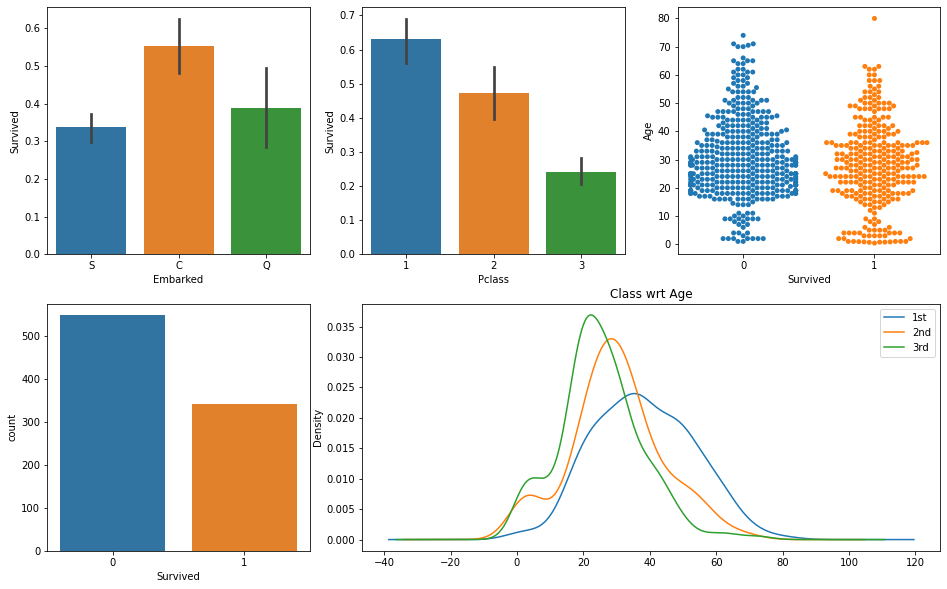

In [23]:
##data visualization
plt.figure(figsize=(16,10))
plt.subplot2grid((2,3),(0,0))
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.subplot2grid((2,3),(0,1))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.subplot2grid((2,3),(0,2))
sns.swarmplot(x='Survived', y='Age', data=train_data)
plt.subplot2grid((2,3),(1,0))
sns.countplot(train_data.Survived)

plt.subplot2grid((2,3),(1,1),colspan=2)
for x in [1,2,3]:
    train_data.Age[train_data.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(('1st','2nd','3rd'))
plt.show()

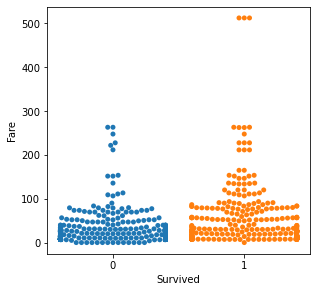

In [115]:
##data visualization and analysis
plt.figure(figsize=(16,10))
plt.subplot2grid((2,3),(0,0))
sns.swarmplot(x='Survived',y='Fare',data=train_data)

plt.show()


In [234]:
##data cleaning
train_cp = train_data.copy()
test_cp = test_data.copy()

data = [train_cp, test_cp]


##step 1, attribute creating and combining, create two more attribute: Family size and Title
for each in data:
    each['Familysize'] = each['SibSp'] + each['Parch'] + 1
    #extract info from other features, titel from name:
    each['Title'] = each['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]
    #outputs: [' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
    #' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
    ##feature engineering #2
    ##For title counts < 5, we will replace it with 'misc'
    title_count = each.Title.value_counts()
    each.Title = each.Title.apply(lambda x: x if title_count[x] > 5 else 'misc')
    print(each.Title.value_counts())

 Mr        517
 Miss      182
 Mrs       125
 Master     40
misc        14
 Dr          7
 Rev         6
Name: Title, dtype: int64
 Mr        240
 Miss       78
 Mrs        72
 Master     21
misc         7
Name: Title, dtype: int64


In [242]:
##data completing, fancy way of interpolate the NaN by randomforestregressor
##Since we have many missing Age values, we are using this fancy way to interpolate
def timefill(data):
    data2 = data.copy()
    ##encoding for 'Title', since it's norminal categorical type, we use onehotencoding
    enc = OneHotEncoder(handle_unknown='ignore')
    column_name = enc.fit(data2[['Title']]).get_feature_names(['Title'])
    enc_data2 = pd.DataFrame(enc.fit_transform(data2[['Title']]).toarray(), columns=column_name)
    data = data2.join(enc_data2) 
    
    listjoin = ['Age', 'SibSp', 'Parch', 'Pclass']+ column_name.tolist()
    print(listjoin)
    
    age_related_feat = data[listjoin]
    #print(age_related_feat)
    age_known = age_related_feat[age_related_feat.Age.notna()].values   ##extract value to form a numpy array instead of dataframe
    age_unknown = age_related_feat[~age_related_feat.Age.notna()].values
    #print(age_unknown)
    
    known_age_y = age_known[:,0]
    known_age_x = age_known[:,1:] 
    
    rf = RandomForestRegressor(random_state=1, n_estimators=300)
    rf.fit(known_age_x, known_age_y)
    
    age_pred = rf.predict(age_unknown[:,1:])
    
    data2.loc[data2.Age.isna(), 'Age'] = np.round_(age_pred, 0)
    data.loc[data.Age.isna(), 'Age'] = np.round_(age_pred, 0)
    #print(data.sample())
    return data2, data    ##wasted 1 hour, cannot define a = b to update a; instead, create new train_orig/dummy to receive new df

train_orig, train_dummy = timefill(data[0])
test_orig, test_dummy = timefill(data[1])

['Age', 'SibSp', 'Parch', 'Pclass', 'Title_ Dr', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Title_misc']
['Age', 'SibSp', 'Parch', 'Pclass', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_misc']


In [243]:
test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             417 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
Familysize       418 non-null int64
Title            418 non-null object
Title_ Master    418 non-null float64
Title_ Miss      418 non-null float64
Title_ Mr        418 non-null float64
Title_ Mrs       418 non-null float64
Title_misc       418 non-null float64
dtypes: float64(7), int64(5), object(6)
memory usage: 58.9+ KB


In [473]:
##data completing and converting
def encoding(each):
    ##since Fare and Embarked only has a very small portion of missing data
    each['Fare'] = each['Fare'].fillna(each['Fare'].dropna().median())
    #data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
    each['Embarked'] = each['Embarked'].fillna(each['Embarked'].dropna().mode()[0])
    
    ##continuous variable assigned to different bins to simplify the data
    each['Farebin'] = pd.qcut(each['Fare'], 12)     ##qcut will create bins with same number of records in each bin
    each['Agebin'] = pd.cut(each['Age'], 10)        ##cut will create bins evenly spaced according to the value
    
    ##since we created 'Family size', 'Farebin', 'Agebin' from other highly correlated features, we will test to find out
    ##whether the new features/old features/combine will work best.
   
    ##does cabin correlates with the survive rate?
    each['hascabin'] = 0
    each.loc[each.Cabin.notna(), 'hascabin'] = 1
    
    ##further converting the categorical variable to numeral:
    ##type 1, norminal categorical convert to onehotencoding
    dummy_embarked = pd.get_dummies(each['Embarked'], prefix='Embarked')  
    ##type 2, ordinal categorical convert to labelencoding
    label = LabelEncoder()
    each['Title'] = label.fit_transform(each['Title'])
    each['Sex'] = label.fit_transform(each['Sex'])
    each['Farebin'] = label.fit_transform(each['Farebin'])
    each['Agebin'] = label.fit_transform(each['Agebin'])
    
    each_dummy = each.join(dummy_embarked)
    
    return each_dummy

train_dummy2 = encoding(train_dummy)
test_dummy2 = encoding(test_dummy)
test_dummy2['Title_ Dr'] = 0     #
test_dummy2['Title_ Rev'] = 0
train_dummy2.info()

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

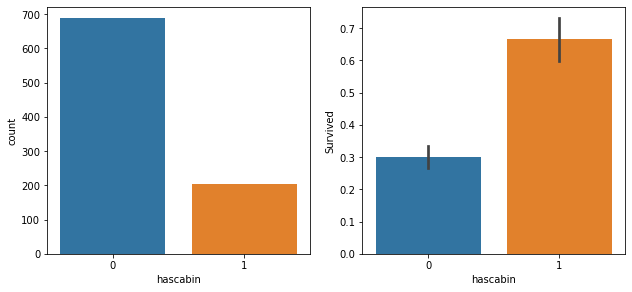

In [476]:
plt.figure(figsize=(16,10))
plt.subplot2grid((2,3),(0,0))
sns.countplot(x=train_dummy2.hascabin)
plt.subplot2grid((2,3),(0,1))
sns.barplot(x=train_dummy2.hascabin, y=train_dummy2.Survived)

In [542]:
##select preliminary features for running through algorithms, select1 uses combined features ('Agebin', 'Farebin', 'Familysize') first
baseline = ['Pclass', 'Sex', 'Age', 'Fare', 'Title',  'Familysize', 'hascabin']
feat_select1 = ['Pclass', 'Sex', 'Agebin', 'Familysize', 'Farebin', 'hascabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Dr', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Title_misc']
feat_select2 = ['Pclass', 'Sex', 'Age', 'Fare', 'Familysize', 'hascabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Dr', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Title_misc']


train_dummy2[feat_select2].sample(5)

,Pclass,Sex,Age,Fare,Familysize,hascabin,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev,Title_misc
835,1,0,39.0,83.1583,3,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
233,3,0,5.0,31.3875,7,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,3,0,14.0,11.2417,2,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
120,2,1,21.0,73.5000,3,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
753,3,1,23.0,7.8958,1,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [433]:
###PART 2 modelling
##logisticregression and baggingclassifier

def logisticreg(data, feature):
    target = data['Survived'].values
    features = data[feature].values
    
    lr = linear_model.LogisticRegression(max_iter=10000)
    
    lr_clf = linear_model.LogisticRegression().fit(features, target)
    bagging_clf = BaggingClassifier(lr, n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
    ensemble = bagging_clf.fit(features, target)
    cv_score = model_selection.cross_val_score(lr_clf, features, target, scoring='accuracy', cv=50)
    print('oob_score:', bagging_clf.oob_score_, 'cv50 score:', cv_score.mean())
    print('logistic regression:', lr_clf.score(features, target), 'emsemble:', ensemble.score(features, target))
    return lr_clf
    
start = time.time()
clf = logisticreg(train_dummy2, feat_select2)
print(time.time() - start)

print(pd.DataFrame({'columns': feat_select2, 'coef': list(clf.coef_.T)}))

'''
oob_score: 0.8282828282828283 cv50 score: 0.8297385620915033
logistic regression: 0.8327721661054994 emsemble: 0.8338945005611672
7.527665615081787
          columns                     coef
0          Pclass     [-1.033740430899036]
1             Sex    [-0.7334517324514039]
2             Age   [-0.03024599863665678]
3           SibSp    [-0.5554444174863823]
4           Parch    [-0.3161961842180114]
5            Fare  [0.0043886982511485905]
6      Embarked_C      [0.883054148352089]
7      Embarked_Q     [0.8517800549596317]
8      Embarked_S     [0.6282989321293444]
9       Title_ Dr     [-0.239837651494893]
10  Title_ Master     [1.8605018115494956]
11    Title_ Miss     [0.9432789001730616]
12      Title_ Mr    [-1.1575381074684028]
13     Title_ Mrs     [1.6498461845079102]
14     Title_ Rev    [-0.6334851507537237]
15     Title_misc   [-0.05963285107248398]
'''

b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

oob_score: 0.8282828282828283 cv50 score: 0.8297385620915033
logistic regression: 0.8327721661054994 emsemble: 0.8338945005611672
7.527665615081787
          columns                     coef
0          Pclass     [-1.033740430899036]
1             Sex    [-0.7334517324514039]
2             Age   [-0.03024599863665678]
3           SibSp    [-0.5554444174863823]
4           Parch    [-0.3161961842180114]
5            Fare  [0.0043886982511485905]
6      Embarked_C      [0.883054148352089]
7      Embarked_Q     [0.8517800549596317]
8      Embarked_S     [0.6282989321293444]
9       Title_ Dr     [-0.239837651494893]
10  Title_ Master     [1.8605018115494956]
11    Title_ Miss     [0.9432789001730616]
12      Title_ Mr    [-1.1575381074684028]
13     Title_ Mrs     [1.6498461845079102]
14     Title_ Rev    [-0.6334851507537237]
15     Title_misc   [-0.05963285107248398]


b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
b:\program files\phthon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [507]:
##manually define cv set using shufflesplit
from sklearn.model_selection import ShuffleSplit, KFold
ssplit = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [549]:
##Randomforest with gridsearchcv for hyperparamerter tuning

def rftuning(data, feature):
    target = data['Survived'].values
    features = data[feature].values
    
    param_grid = {'n_estimators': [300, 600, 800, 1000, 1200, 1500], 'max_depth': [5, 10, 15, 20, 25, 30, 35], 'max_features': [0.4, 0.7, 1], 'random_state': [10]}
    #param_grid = {'n_estimators': [300, 600, 800, 1000, 1200, 1500], 'max_depth': [5, 10, 15, 20, 25, 30, 35], 'max_features': [0.4, 0.7, 1], 'min_samples_leaf': [1,2], 'min_samples_split': [2,5]}
    rfclf = RandomForestClassifier()
    model_tune = model_selection.GridSearchCV(rfclf, param_grid=param_grid, cv=10, n_jobs=-1)
    model_tune.fit(features, target)
    print(model_tune.best_params_, model_tune.best_score_)

rftuning(train_dummy2, revised_select2)
###Baseline first test: {'max_depth': 10, 'max_features': 0.7, 'n_estimators': 1000, 'random_state': 10} baseline_cvscore: 0.8429088639200998
###Baseline second test: {'max_depth': 30, 'max_features': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300} baseline_cvscore: 0.8373283395755307
###select1 first test: {'max_depth': 10, 'max_features': 0.7, 'n_estimators': 600, 'random_state': 10} select1_cvscore: 0.8272409488139825
###select2 first test: {'max_depth': 5, 'max_features': 0.7, 'n_estimators': 800, 'random_state': 10} select2_cvscore: 0.8361797752808988
###select2 second test: {'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300} select2_cvscore: 0.833932584269663


##experiments to discover collinearity impact
##baseline{'max_depth': 10, 'max_features': 1, 'n_estimators': 1500, 'random_state': 10} 0.8373158551810237       ['Pclass', 'Sex', 'Age', 'Fare', 'Title',  'Familysize', 'hascabin']
##baseline{'max_depth': 10, 'max_features': 0.4, 'n_estimators': 1500, 'random_state': 10} 0.8350561797752809    ['Pclass', 'Sex', 'Age', 'Fare', 'Title',  'SibSp', 'Parch', 'Familysize', 'hascabin']
##baseline{'max_depth': 10, 'max_features': 0.4, 'n_estimators': 300, 'random_state': 10} 0.833932584269663    ['Pclass', 'Sex', 'Age', 'Fare', 'Title',  'SibSp', 'Parch', 'hascabin']

##feat_select2 {'max_depth': 5, 'max_features': 0.7, 'n_estimators': 600, 'random_state': 10} 0.8339200998751559 with Familysize, no SibSp and Parch
##feat_select2 {'max_depth': 5, 'max_features': 0.7, 'n_estimators': 600, 'random_state': 10} 0.8316729088639201 with SibSp and Parch, no Familysize

{'max_depth': 5, 'max_features': 0.7, 'n_estimators': 600, 'random_state': 10} 0.8339200998751561


In [551]:
##for plotting the CV scores for rftuning result:
target = train_dummy2['Survived'].values
features = train_dummy2[revised_select2].values
#rft = RandomForestClassifier(max_depth=5, max_features=0.7, n_estimators=600, random_state=10)
rft = RandomForestClassifier(max_depth=5, max_features=0.7, n_estimators=600, random_state=10)
rft_fit = rft.fit(features, target)
cvscore = model_selection.cross_val_score(rft_fit, features, target, scoring='accuracy', cv=kfold)
print(cvscore.mean())
print(rft.score(features, target))
#print(np.array(rft.feature_importances_).T)

#print(pd.DataFrame({'features': feat_select2, 'importance': list(rft.feature_importances_)}).sort_values(['importance'],ascending=False))

#temp = pd.DataFrame({'features': feat_select2, 'importance': list(rft.feature_importances_)}).sort_values(['importance'],ascending=False)
#revised_select2 = temp.features[temp.importance >= 0.005].tolist()

'''cv10
0.8316729088639201
0.8709315375982043
'''

0.8271797125102003
0.8608305274971941


'cv10\n0.8316729088639201\n0.8709315375982043\n'

In [532]:
##analyse the feature importance from RF with plotting
print(rtf.feat_importance_)

NameError: name 'rtf' is not defined

In [483]:
##XGBoost with Hyperopt turning
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb

target = train_dummy2['Survived'].values
features = train_dummy2[feat_select2].values

space = {'n_estimators': hp.quniform('n_estimators', 300, 4000, 100),
         'gamma' : hp.uniform('gamma', 0.01, 0.1),
         'learning_rate': hp.uniform('learning_rate', 0.0001, 0.05),
         'max_depth': hp.quniform('max_depth', 3, 15, 1),
         'subsample': hp.uniform('subsample', 0.3, 1),
         'reg_lambda': hp.uniform('reg_lambda', 1, 20)
        }

def Xgbtuning(space):
    
    reg = xgb.XGBClassifier(n_estimators=int(space['n_estimators']), max_depth=int(space['max_depth']), gamma=space['gamma'], learning_rate=space['learning_rate'], reg_lambda=space['reg_lambda'], subsample=space['subsample'])
    ##reg.fit(features, target, eval_set=evaluation, eval_metric="rmse",early_stopping_rounds=10,verbose=False)  need training/test set to evaluate the early stopping, since we are using hyperopt to evaluate the hyperparamerters
    #reg.fit(features, target)
    cvscore = model_selection.cross_val_score(reg, features, target, scoring='accuracy', cv=10, n_jobs=-1).mean()
    #print(cvscore)
    return -cvscore
#Xgbtuning(space)

best = fmin(fn=Xgbtuning, space=space, max_evals=20, rstate=np.random.RandomState(1), algo=tpe.suggest, trials=Trials())
print(best)

'''baseline
100%|███████| 20/20 [01:32<00:00,  4.63s/trial, best loss: -0.8440449438202247]
{'gamma': 0.0507676614886495, 'learning_rate': 0.023584156065539923, 'max_depth': 10.0, 'n_estimators': 400.0, 'reg_lambda': 7.830728160411843, 'subsample': 0.9143795923444387}
'''
'''select1
100%|███████| 20/20 [02:13<00:00,  6.69s/trial, best loss: -0.8406991260923846]
{'gamma': 0.08860352170413334, 'learning_rate': 0.02092327283068115, 'max_depth': 8.0, 'n_estimators': 700.0, 'reg_lambda': 8.81988691381664, 'subsample': 0.7924080292984343}
'''
'''select2
100%|███████| 20/20 [02:35<00:00,  7.77s/trial, best loss: -0.8361797752808988]
{'gamma': 0.0771794096251446, 'learning_rate': 0.02023231295861686, 'max_depth': 8.0, 'n_estimators': 400.0, 'reg_lambda': 7.357524358820571, 'subsample': 0.778490207912004}
'''


100%|███████| 20/20 [02:35<00:00,  7.80s/trial, best loss: -0.8316853932584269]
{'gamma': 0.03988564584911725, 'learning_rate': 0.00627518795574769, 'max_depth': 10.0, 'n_estimators': 2600.0, 'reg_lambda': 7.017000573168227, 'subsample': 0.4432958798301208}


"select2\n100%|███████| 20/20 [02:35<00:00,  7.77s/trial, best loss: -0.8361797752808988]\n{'gamma': 0.0771794096251446, 'learning_rate': 0.02023231295861686, 'max_depth': 8.0, 'n_estimators': 400.0, 'reg_lambda': 7.357524358820571, 'subsample': 0.778490207912004}\n"

In [504]:
##XGBoost after getting the best hyperparameters:
target = train_dummy2['Survived'].values
features = train_dummy2[feat_select2].values
xgboost = xgb.XGBClassifier(gamma=0.0399, learning_rate=0.0063, max_depth=10, n_estimators=2600, reg_lambda=7.0170, subsample=0.4433)
xgb_fit = xgboost.fit(features, target, eval_metric='rmse', verbose=False)
cvscore = model_selection.cross_val_score(xgboost, features, target, scoring='accuracy', cv=10, n_jobs=-1).mean()
print(cvscore)

0.830561797752809


In [488]:
##Random forest and XGBoost are two of the most robust algorithms for this kind of quesions.
##We are going to use model emsemble to further reduce the variance and improve the accuracy
target = train_dummy2['Survived'].values
features = train_dummy2[feat_select2].values

rf_pred = rft_fit.predict(features)
xgb_pred = xgb_fit.predict(features)

vote_est = [('rf', rft_fit),('xgb', xgb_fit)]

vote_hard = VotingClassifier(estimators=vote_est, voting='hard').fit(features, target)
vote_hard_cv = model_selection.cross_validate(vote_hard, features, target, cv=20)
print('hard voting:', vote_hard_cv['test_score'].mean())


vote_soft = VotingClassifier(estimators=vote_est, voting='soft').fit(features, target)
vote_soft_cv = model_selection.cross_validate(vote_soft, features, target, cv=20)
print('soft voting:', vote_soft_cv['test_score'].mean())

'''feat_select1
hard voting: 0.8329040404040405
soft voting: 0.834090909090909
'''
'''feat_select2
hard voting: 0.8338383838383837
soft voting: 0.8328030303030303
'''

hard voting: 0.8305050505050506
soft voting: 0.8327272727272728


'feat_select2\nhard voting: 0.8338383838383837\nsoft voting: 0.8328030303030303\n'

In [552]:
##QC with the groundtruth to find the best prediction before submission
groundtruth = pd.read_csv('datasets_677541_1190700_titanic.csv')
print(groundtruth.shape)
test_feat = test_dummy2[revised_select2].values


#test_data['Sexn'] = 0
#test_data.loc[test_data.Sex == 'female', 'Sexn'] = 1

result = rft.predict(test_feat)
pds = pd.Series(result, name='pred')

comb = pd.concat([groundtruth, pds], axis=1)
#print(pd.concat([groundtruth, pds], axis=1))
comb['correct'] = 0
comb.loc[comb.Survived == comb.pred, 'correct'] = 1
comb.correct.value_counts(normalize=True)

##based on Sex alone: 0.76555
##baseline model: 0.746411
##feat_select1 model: 0.763158
##feat_select2 model: 0.770335
##feat_select2 model: 0.777512   #adding 'hascabin' #vote_hard, bascially from RF


(418, 2)


1    0.777512
0    0.222488
Name: correct, dtype: float64

In [441]:
##save out a prediction for submission

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': result})
output.to_csv('0814_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [443]:
import os

os.getcwd()

'C:\\Users\\Vincent\\Kaggle_competetions\\titanic'